import csv

file = open('Spotify.csv')
csvreader = csv.reader(file)
header = []
header = next(csvreader)
header

In [20]:
import pandas as pd
data= pd.read_csv("Spotify.csv")

data.columns


Index(['Rank', 'Track', 'Artist', 'Streams', 'Link', 'Week', 'Album_Name',
       'Duration_MS', 'Explicit', 'Track_Number_on_Album', 'Artist_Followers',
       'Artist_Genres'],
      dtype='object')

In [171]:
data.shape

(44195, 14)

In [3]:
data.Artist_Genres

0        ['canadian contemporary r&b', 'canadian pop', ...
1        ['dance pop', 'edm', 'electropop', 'pop', 'pop...
2        ['dance pop', 'edm', 'pop', 'pop dance', 'post...
3        ['dance pop', 'edm', 'electronic trap', 'pop',...
4          ['dance pop', 'pop', 'post-teen pop', 'uk pop']
                               ...                        
44195    ['dance pop', 'pop', 'pop rap', 'seattle hip h...
44196    ['argentine hip hop', 'trap argentino', 'trap ...
44197                                    ['pop', 'uk pop']
44198    ['alternative rock', 'grunge', 'permanent wave...
44199                         ['emo rap', 'miami hip hop']
Name: Artist_Genres, Length: 44200, dtype: object

In [138]:
#isna() function is used to detect missing values
#isna(). sum() returns the number of missing values in each column.

data.isna().sum()


Rank                     0
Track                    0
Artist                   0
Streams                  0
Link                     0
Week                     0
Album_Name               0
Duration_MS              0
year                     0
month                    0
Explicit                 0
Track_Number_on_Album    0
Artist_Followers         0
Artist_Genres            0
dtype: int64

In [136]:
data.dropna(how='any', inplace=True)


import matplotlib.pyplot as plt

df_genre = data['Streams'].value_counts() / len(data)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()

# Pie chart for genre
fig1, ax1 = plt.subplots(figsize=(100,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
plt.show()

In [23]:
n = data.nunique(axis=0)
n

Rank                       200
Track                     3511
Artist                     822
Streams                  44099
Link                      4242
Week                       221
Album_Name                2434
Duration_MS               3601
Explicit                     2
Track_Number_on_Album       33
Artist_Followers           823
Artist_Genres              661
dtype: int64

In [155]:
top_artists =[]
top_song_for_each_year = data.sort_values(by=(['Streams']), ascending=False).groupby('year').head(1)
top_sngs= top_song_for_each_year.sort_values('year',ascending=False)
top_artists = top_song_for_each_year.Artist
print(top_artists)
print(top_sngs[['Artist','Track','year','Streams']].reset_index())

41800    Olivia Rodrigo
21000     Ariana Grande
15600             Drake
1800         Ed Sheeran
41000      Mariah Carey
Name: Artist, dtype: object
   index          Artist                            Track  year   Streams
0  41800  Olivia Rodrigo                  drivers license  2021  80764045
1  41000    Mariah Carey  All I Want for Christmas Is You  2020  53401383
2  21000   Ariana Grande                          7 rings  2019  71467874
3  15600           Drake                   In My Feelings  2018  67499798
4   1800      Ed Sheeran                     Shape of You  2017  64275251


In [25]:
data.info()
#data['Week'] = pd.to_datetime(data['Week'], format='%Y-%m-%d')

#year = data['Week'].apply(lambda x : x.year)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44195 entries, 0 to 44199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   44195 non-null  int64 
 1   Track                  44195 non-null  object
 2   Artist                 44195 non-null  object
 3   Streams                44195 non-null  int64 
 4   Link                   44195 non-null  object
 5   Week                   44195 non-null  object
 6   Album_Name             44195 non-null  object
 7   Duration_MS            44195 non-null  int64 
 8   Explicit               44195 non-null  bool  
 9   Track_Number_on_Album  44195 non-null  int64 
 10  Artist_Followers       44195 non-null  int64 
 11  Artist_Genres          44195 non-null  object
dtypes: bool(1), int64(5), object(6)
memory usage: 4.1+ MB


In [26]:
genre_count= data.Artist_Genres.value_counts()
genre_count

['pop', 'uk pop']                                                          1576
['pop', 'post-teen pop']                                                   1463
['dance pop', 'pop', 'post-teen pop']                                      1389
['dfw rap', 'melodic rap', 'rap']                                          1296
['emo rap', 'miami hip hop']                                                948
                                                                           ... 
['indie cafe pop']                                                            1
['disco', 'funk', 'post-disco', 'quiet storm']                                1
['escape room']                                                               1
['modern folk rock', 'modern rock', 'stomp and holler', 'uk americana']       1
['pop']                                                                       1
Name: Artist_Genres, Length: 661, dtype: int64

In [27]:
data['Week'] = pd.to_datetime(data['Week'], format='%d-%m-%Y')
year = data['Week'].apply(lambda x : x.year)
month = data['Week'].apply(lambda x : x.month)
data.insert(loc=8, column='year', value=year) 
data.insert(loc=9, column='month', value=month)

In [28]:
# checking new col month and year
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44195 entries, 0 to 44199
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   44195 non-null  int64         
 1   Track                  44195 non-null  object        
 2   Artist                 44195 non-null  object        
 3   Streams                44195 non-null  int64         
 4   Link                   44195 non-null  object        
 5   Week                   44195 non-null  datetime64[ns]
 6   Album_Name             44195 non-null  object        
 7   Duration_MS            44195 non-null  int64         
 8   year                   44195 non-null  int64         
 9   month                  44195 non-null  int64         
 10  Explicit               44195 non-null  bool          
 11  Track_Number_on_Album  44195 non-null  int64         
 12  Artist_Followers       44195 non-null  int64         
 13  A

In [ ]:
artist_list = data.Artist.value_counts()[:7]
df_artists = data[data.Artist.isin(artist_list)][['Artist','year',
                                                        'Streams']].groupby(['Artist','year']).count().reset_index()
df_artists.rename(columns={'Artist':'song_count'}, inplace=True)
df_artists.head()

,song_count,year,Streams


<BarContainer object of 11 artists>

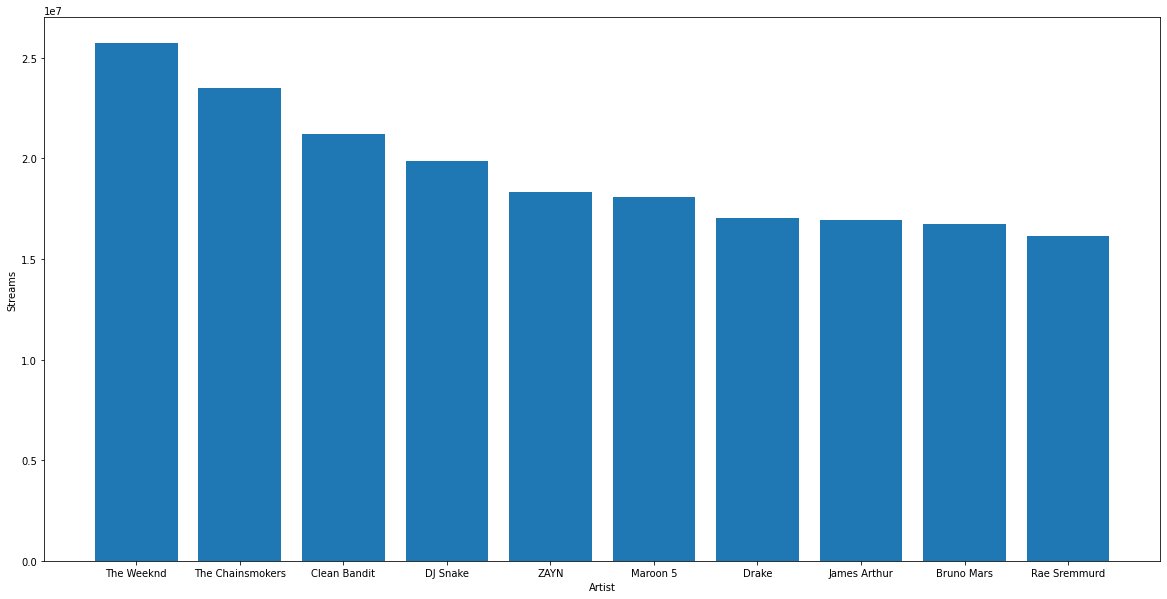

In [130]:
import matplotlib.pyplot as plt
top10 = data.head(11)
type(top10)
x = top10.Artist
y= top10.Streams
top10
plt.figure(figsize=(20,10))
plt.xlabel('Artist')
plt.ylabel('Streams')

plt.bar(x, y)


<BarContainer object of 11 artists>

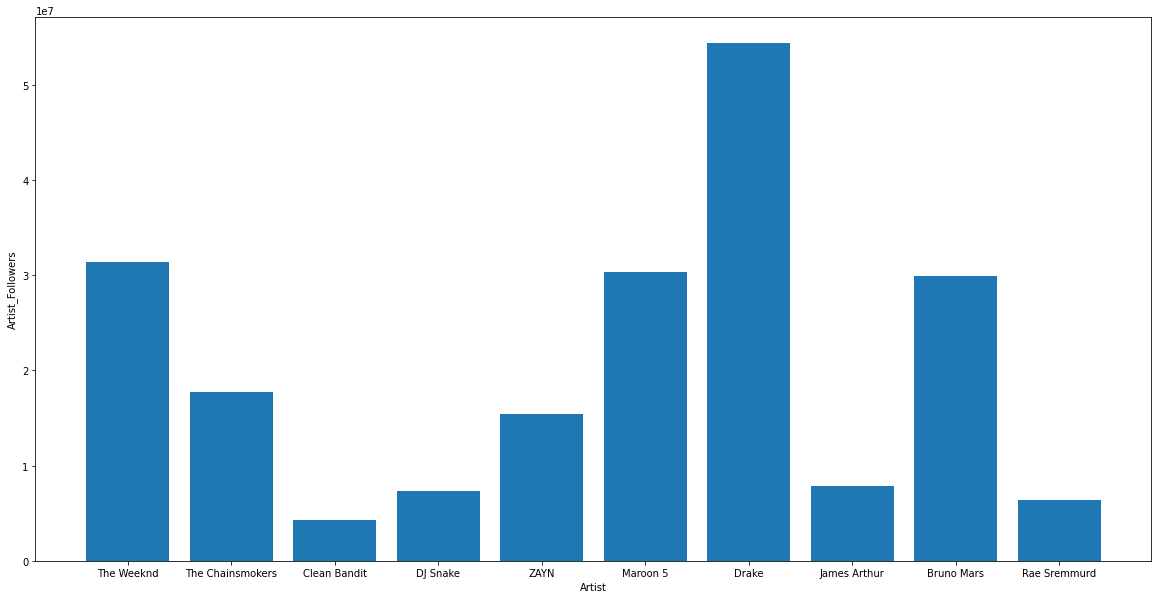

In [132]:
top10_followed = data.head(11)
x = top10_followed.Artist
y= top10_followed.Artist_Followers

plt.figure(figsize=(20,10))
plt.xlabel('Artist')
plt.ylabel('Artist_Followers')
plt.bar(x, y)


In [46]:
top10

,Rank,Track,Artist,Streams,Link,Week,Album_Name,Duration_MS,year,month,Explicit,Track_Number_on_Album,Artist_Followers,Artist_Genres
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-06,Starboy,230453,2017,1,True,1,31348348,"['canadian contemporary r&b', 'canadian pop', ..."
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-06,Closer,244960,2017,1,False,1,17742887,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-06,Rockabye (feat. Sean Paul & Anne-Marie),251088,2017,1,False,1,4296325,"['dance pop', 'edm', 'pop', 'pop dance', 'post..."
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-06,Encore,205946,2017,1,False,13,7312319,"['dance pop', 'edm', 'electronic trap', 'pop',..."
4,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-06,I Don’t Wanna Live Forever (Fifty Shades Darker),245200,2017,1,False,1,15423979,"['dance pop', 'pop', 'post-teen pop', 'uk pop']"
5,6,Don't Wanna Know,Maroon 5,18064374,https://open.spotify.com/track/5MFzQMkrl1FOOng...,2017-01-06,Don't Wanna Know,214480,2017,1,False,1,30323494,"['pop', 'pop rock']"
6,7,Fake Love,Drake,17037036,https://open.spotify.com/track/343YBumqHu19cGo...,2017-01-06,More Life,210937,2017,1,True,20,54405324,"['canadian hip hop', 'canadian pop', 'hip hop'..."
7,8,Say You Won't Let Go,James Arthur,16950854,https://open.spotify.com/track/5uCax9HTNlzGybI...,2017-01-06,Back from the Edge,211466,2017,1,False,2,7893527,"['pop', 'post-teen pop', 'talent show', 'uk pop']"
8,9,24K Magic,Bruno Mars,16736035,https://open.spotify.com/track/6b8Be6ljOzmkOmF...,2017-01-06,24K Magic,225983,2017,1,False,1,29942000,"['dance pop', 'pop', 'post-teen pop']"
9,10,I Feel It Coming,The Weeknd,16609685,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-06,Starboy,269186,2017,1,False,18,31348348,"['canadian contemporary r&b', 'canadian pop', ..."


## top 5 streams of per year

In [204]:
#top5 = data.sort_values(by='Streams', ascending=False)
top5_by_year = data.groupby(["year"])
top5_of_2017 = data.sort_values(by=['Streams','year','Artist'],ascending=False).head(5)
print(top5_of_2017[['Track', 'Streams','Week']].reset_index())

   index            Track   Streams       Week
0  41800  drivers license  80764045 2021-01-22
1  21000          7 rings  71467874 2019-01-25
2  15600   In My Feelings  67499798 2018-07-20
3  25800         Señorita  67237638 2019-07-12
4  25600         Señorita  66933317 2019-07-05


## top 5 streams of 2017

In [206]:
top5_of_2017 = top5_by_year.get_group(2017).sort_values('Streams',ascending=False).head(5)
print(top5_of_2017[['Track', 'Streams','Week']].reset_index())

   index              Track   Streams       Week
0   1800       Shape of You  64275251 2017-03-10
1   2000       Shape of You  57006531 2017-03-17
2   4000  Despacito - Remix  54848635 2017-05-26
3   1200       Shape of You  53604545 2017-02-17
4   1000       Shape of You  53551099 2017-02-10


## Top 5 Streams of 2018

In [203]:

top5_of_2018 = top5_by_year.get_group(2018).sort_values('Streams',ascending=False).head(5)
print(top5_of_2018[['Track', 'Streams','Week']].reset_index())

   index           Track   Streams       Week
0  15600  In My Feelings  67499798 2018-07-20
1  15800  In My Feelings  65825491 2018-07-27
2  16000  In My Feelings  60285459 2018-08-03
3  19000   thank u, next  59975503 2018-11-16
4  11600      God's Plan  54891573 2018-03-02


## Top 5 Streams of 2019 (Weekwise)

In [213]:
top5_of_2019 = top5_by_year.get_group(2019).sort_values('Streams',ascending=False).head(5)
print(top5_of_2019[['Track', 'Streams','Week']].reset_index())

   index     Track   Streams       Week
0  21000   7 rings  71467874 2019-01-25
1  25800  Señorita  67237638 2019-07-12
2  25600  Señorita  66933317 2019-07-05
3  26000  Señorita  64942021 2019-07-19
4  21600   7 rings  63197614 2019-02-15


## Top 5 Streams of 2020

In [201]:
top5_of_2020 = top5_by_year.get_group(2020).sort_values('Streams',ascending=False).head(5)
print(top5_of_2020[['Track', 'Streams','Week']].reset_index())

   index                            Track   Streams       Week
0  41000  All I Want for Christmas Is You  53401383 2020-12-25
1  40400                           DÁKITI  53344093 2020-12-04
2  39800                           DÁKITI  53029262 2020-11-13
3  33200                  Blinding Lights  52375259 2020-03-27
4  31200                     Dance Monkey  52055226 2020-01-17


## Top 5 streams of 2021

In [200]:
top5_of_2021 = top5_by_year.get_group(2021).sort_values('Streams',ascending=False).head(5)
print(top5_of_2021[['Track', 'Streams','Week']].reset_index())

   index                           Track   Streams       Week
0  41800                 drivers license  80764045 2021-01-22
1  41600                 drivers license  65873080 2021-01-15
2  42000                 drivers license  64681075 2021-01-29
3  44000  MONTERO (Call Me By Your Name)  55582612 2021-04-16
4  42200                 drivers license  54166615 2021-02-05


In [160]:
data[data["Artist_Genres"]=='[]']
df_genre=data[data["Artist_Genres"]!='[]']
df_genre.head()
df_sort_genres=pd.DataFrame(data.assign(Artist_Genres=df_genre.Artist_Genres.str.split(",")).explode('Artist_Genres'))
df_sort_genres.tail()

,Rank,Track,Artist,Streams,Link,Week,Album_Name,Duration_MS,year,month,Explicit,Track_Number_on_Album,Artist_Followers,Artist_Genres
44198,199,Smells Like Teen Spirit,Nirvana,5154452,https://open.spotify.com/track/1f3yAtsJtY87CTm...,2021-04-16,Nevermind (Deluxe Edition),301920,2021,4,False,1,12519629,'grunge'
44198,199,Smells Like Teen Spirit,Nirvana,5154452,https://open.spotify.com/track/1f3yAtsJtY87CTm...,2021-04-16,Nevermind (Deluxe Edition),301920,2021,4,False,1,12519629,'permanent wave'
44198,199,Smells Like Teen Spirit,Nirvana,5154452,https://open.spotify.com/track/1f3yAtsJtY87CTm...,2021-04-16,Nevermind (Deluxe Edition),301920,2021,4,False,1,12519629,'rock']
44199,200,SAD!,XXXTENTACION,5139543,https://open.spotify.com/track/3ee8Jmje8o58CHK...,2021-04-16,?,166605,2021,4,True,4,26792113,['emo rap'
44199,200,SAD!,XXXTENTACION,5139543,https://open.spotify.com/track/3ee8Jmje8o58CHK...,2021-04-16,?,166605,2021,4,True,4,26792113,'miami hip hop']


In [163]:
df_sort_genres['Artist_Genres']=df_sort_genres.Artist_Genres.str.replace('[',' ')
df_sort_genres['Artist_Genres']=df_sort_genres.Artist_Genres.str.replace(']',' ')

C:\Users\Nikki\AppData\Local\Temp/ipykernel_22700/166888204.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sort_genres['Artist_Genres']=df_sort_genres.Artist_Genres.str.replace('[',' ')
C:\Users\Nikki\AppData\Local\Temp/ipykernel_22700/166888204.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sort_genres['Artist_Genres']=df_sort_genres.Artist_Genres.str.replace(']',' ')


In [168]:
n = 10
top_30=pd.DataFrame(df_sort_genres['Artist_Genres'].value_counts()[:n]).reset_index()
top_30.rename(columns = {'index':'Genres','Artist_Genres':'Total_Count'}, inplace = True)
top_30

,Genres,Total_Count
0,'pop',16809
1,'dance pop',11173
2,'latin',6208
3,'rap',5915
4,'pop rap',5601
5,'post-teen pop',5559
6,'reggaeton',5530
7,'edm',4762
8,'electropop',4536
9,'pop dance',4269


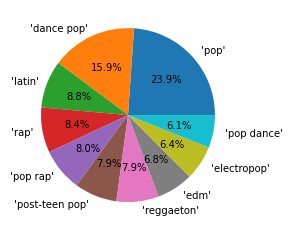

In [170]:
plt.pie(top_30.Total_Count, labels=top_30.Genres , autopct='%1.1f%%')
plt.show()

In [218]:
pop_genre = data.groupby("Artist_Genres")[["Streams"]].sum().sort_values("Streams",ascending=False).head(5)
pop_genre
# lables = top_30.Genres
# plt.pie(top_30.Total_Count,labels=top_30.Genres)

,Streams
Artist_Genres,
"['pop', 'post-teen pop']",15712829720
"['pop', 'uk pop']",14298362370
"['dfw rap', 'melodic rap', 'rap']",13565225335
"['dance pop', 'pop', 'post-teen pop']",12003080436
"['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']",9075103253
